In [29]:
#import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt
#import matplotlib as mpl
#import pandas as pd
#import numpy as np
import glob
import os
import copy
import ROOT as r
print('ready')

ready


In [51]:
files=['filelists/AmLi_1336.root', 'filelists/AmLi_700.root']
file=r.TFile(files[0])
histograms=['h1_tpcLG_nPulses','h1_tpcLG_chPulseArea', 'h1_odLG_pulseStartTime','h2_odHG_pulseArea_pulseLength']
file.ls()

TFile**		filelists/AmLi_1336.root	
 TFile*		filelists/AmLi_1336.root	
  KEY: TH2F	h2_all_s1_s2;1	
  KEY: TH1F	h1_all_s1_s2;1	
  KEY: TH1F	h1_rate;1	
  KEY: TH1F	h1_tpcLG_nPulses;1	h1_tpcLG_nPulses
  KEY: TH1F	h1_tpcLG_pulseStartTime;1	h1_tpcLG_pulseStartTime ns
  KEY: TH1F	h1_tpcLG_pulseEndTime;1	h1_tpcLG_pulseEndTime ns
  KEY: TH1F	h1_tpcLG_pulseLength;1	h1_tpcLG_pulseLength ms
  KEY: TH1F	h1_tpcLG_pulseArea;1	h1_tpcLG_pulseArea
  KEY: TH1F	h1_tpcLG_photonCount;1	h1_tpcLG_photonCount
  KEY: TH1F	h1_tpcLG_peakTime;1	h1_tpcLG_peakTime
  KEY: TH1F	h1_tpcLG_peakAmp;1	h1_tpcLG_peakAmp
  KEY: TH1F	h1_tpcLG_nPulsesSat;1	h1_tpcLG_nPulsesSat
  KEY: TH1F	h1_tpcLG_chPulseArea;1	h1_tpcLG_chPulseArea
  KEY: TH1F	h1_tpcLG_chPulseAreaSize;1	h1_tpcLG_chPulseAreaSize
  KEY: TH1F	h1_tpcLG_chPeakTime;1	h1_tpcLG_chPeakTime
  KEY: TH1F	h1_tpcLG_chPeakAmp;1	h1_tpcLG_chPeakAmp
  KEY: TH2F	h2_tpcLG_pulseArea_pulseLength;1	h2_tpcLG_pulseArea_pulseLength
  KEY: TH2F	h2_tpcLG_pulseArea_peakAmp;1	h2_tpcLG_pulseA

In [52]:
def get_histo(file, histoname):
    file=r.TFile(file)
    histo=file.Get(histoname)
    return copy.deepcopy(histo)
print('test')

test


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvasName


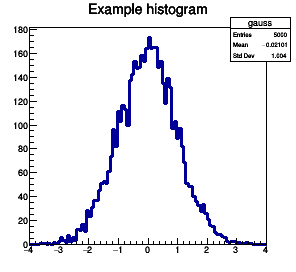

In [53]:
h = r.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")
c = r.TCanvas("myCanvasName","The Canvas Title",300,300)
h.Draw()
c.Draw()    

filelists/AmLi_1336.root
0
filelists/AmLi_700.root
1


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


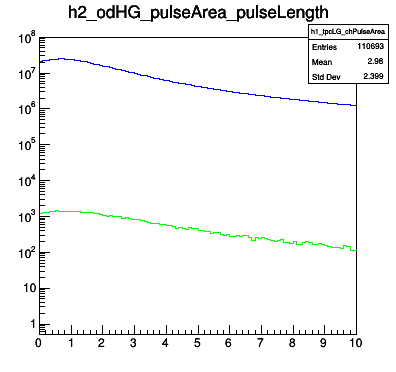

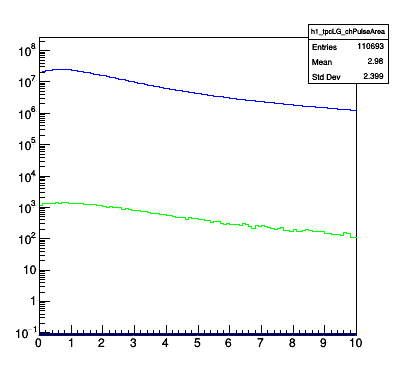

In [54]:
c1 = r.TCanvas("c1","c1",400,400)
c1.SetLogy()
#c1.SetLogx()
stack=r.THStack()
for idx, f in enumerate(files):
        print(f)
        print idx
        h=get_histo(f, 'h1_tpcLG_chPulseArea')
     #   h=get_histo(f, histograms[0]) 
        h.SetTitle(hname)
        h.GetYaxis().SetRangeUser(0.5, 1E8)
        h.SetLineColor(idx+3)
        stack.Add(h)
        if idx==0: 
            #h = r.TH1F("gauss","Example histogram",100,-4,4)
            #h.GetYaxis().SetRangeUser(0.5, 1E8)
            #h.FillRandom("gaus")
            h.Draw()
        else: 
            h.Draw('same')
c1.Draw()

c2 = r.TCanvas("c2","c2",400,400)
c2.SetLogy()
stack.Draw('nostack')
c2.Draw()

h1_tpcLG_nPulses


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2


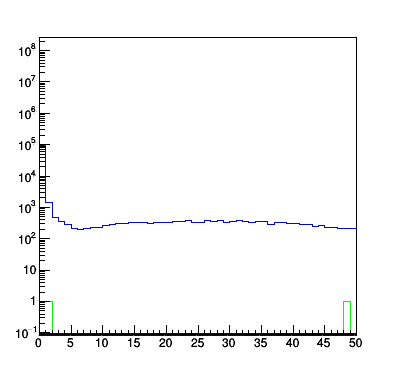

h1_tpcLG_chPulseArea


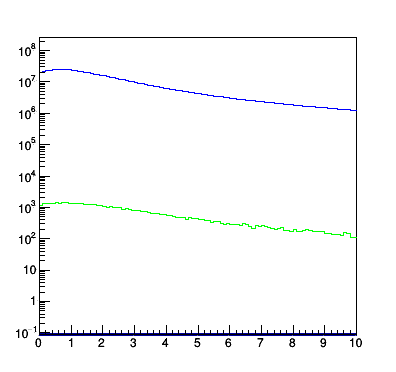

h1_odLG_pulseStartTime


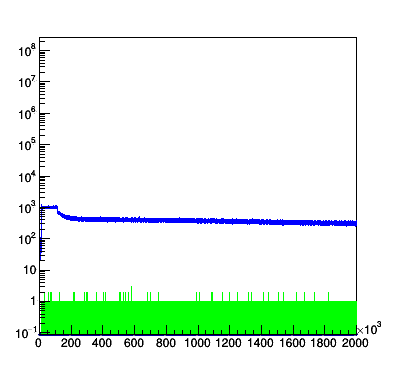

h2_odHG_pulseArea_pulseLength


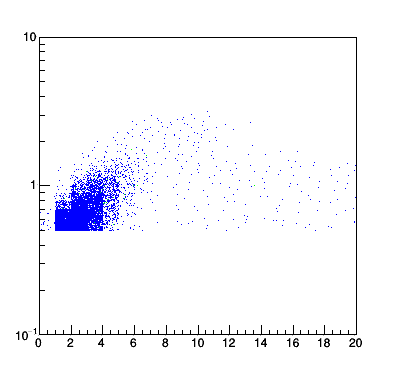

In [55]:

for hname in histograms: 
    print(hname)
    #c1 = r.TCanvas("c1","c1",400,400)
    #c1.SetLogy()
    stack=r.THStack()
    for idx, f in enumerate(files):
            h=get_histo(f, hname)    
            h.GetYaxis().SetRangeUser(0.5, 1E8)
            h.SetLineColor(idx+3)
            h.SetMarkerColor(idx+3)
            stack.Add(h)
            #if idx==0: 
            #    h.Draw()
            #else: 
            #    h.Draw('same')
    #c1.Draw()
    c2 = r.TCanvas("c2","c2",400,400)
    c2.SetLogy()
    stack.Draw('nostack')
    c2.Draw()
    del c2